In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import rand
from matplotlib import font_manager,rc

In [2]:
df = pd.read_csv("201112_202001_연령별인구현황_연간.csv",encoding='CP949')

In [3]:
#전라북도 = df[df['행정구역'].str.contains("전라북도")]
#전라북도 = 전라북도.drop(188)
#전라남도 = df[df['행정구역'].str.contains("전라남도")]
#전라남도 = 전라남도.drop(205)
#광주광역시 = df[df['행정구역'].str.contains("광주광역시")]

서울 = df[df['행정구역'].str.contains("서울")]
경기도 = df[df['행정구역'].str.contains("인천|경기도")]
강원도 = df[df['행정구역'].str.contains("강원")]
충청도 = df[df['행정구역'].str.contains("충청|대전|세종")]
경상도 = df[df['행정구역'].str.contains("경상|부산|울산|대구")] #부산
전라도 = df[df['행정구역'].str.contains("전라|광주")]
제주도 = df[df['행정구역'].str.contains("제주")]
전국=pd.concat([서울,경기도,강원도,충청도,경상도,전라도,제주도])

In [4]:
region=eval(input("도: "))
year = input("년도: ")

a=region[['행정구역', year +'년_계_총인구수',year+'년_계_연령구간인구수']]
a['65세이상 인구 비율'] = region[year+"년_계_연령구간인구수"]/region[year+'년_계_총인구수'] * 100
a

도: 전국
년도: 2020


<ipython-input-4-efb1146e13a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['65세이상 인구 비율'] = region[year+"년_계_연령구간인구수"]/region[year+'년_계_총인구수'] * 100


,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,65세이상 인구 비율
0,서울특별시,9699232,1544944,15.928519
1,서울특별시 종로구,149952,28193,18.801350
2,서울특별시 중구,125800,23937,19.027822
3,서울특별시 용산구,229786,39524,17.200352
4,서울특별시 성동구,295591,45199,15.291061
...,...,...,...,...
223,전라남도 진도군,30300,10242,33.801980
224,전라남도 신안군,39271,14276,36.352525
275,제주특별자치도,672948,104872,15.583968
276,제주특별자치도 제주시,491446,69823,14.207665


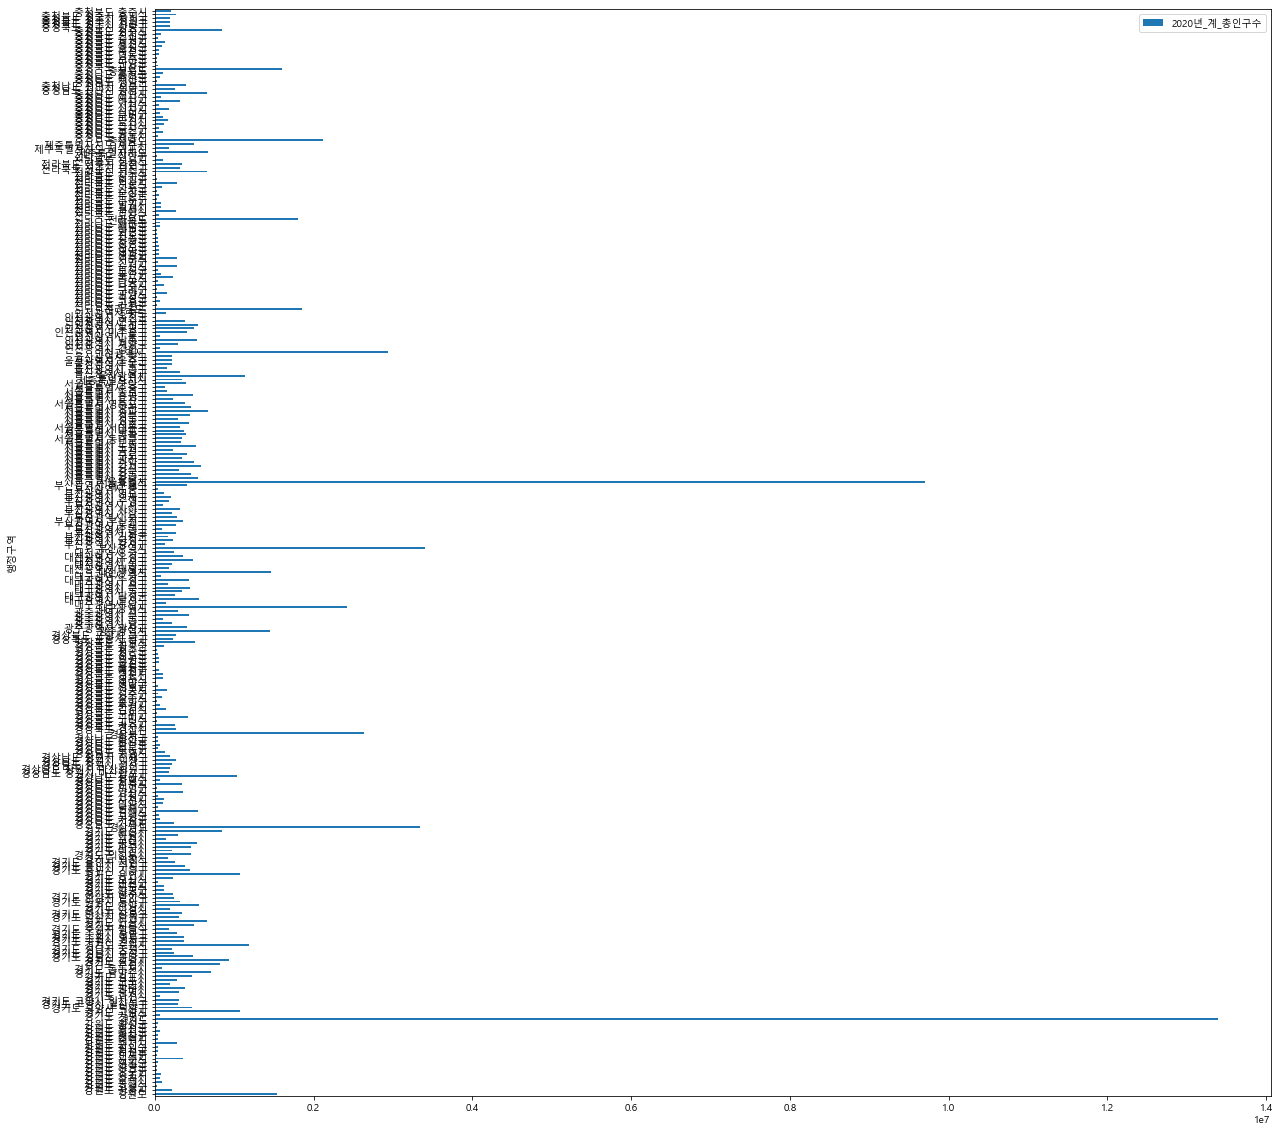

In [5]:
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
aa=a.pivot_table(index="행정구역", values=str(year)+"년_계_총인구수")
aa.plot(kind='barh',figsize=(20,20))

시군구 입력: 목포시


<ipython-input-7-4b5a95d71257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_location_[str(i)+'년65세이상비율'] = a_location_.apply(lambda row: (row[str(i)+'년_계_연령구간인구수'] / row[str(i)+'년_계_총인구수']),axis=1)


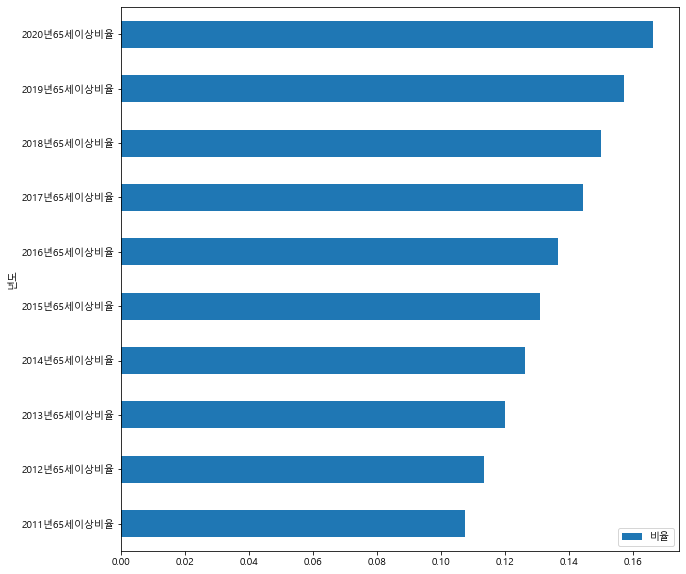

In [7]:
a_location = input("시군구 입력: ")
a_location_ = region[region["행정구역"].str.contains(a_location)]
for i in range(2011,2021):
    a_location_[str(i)+'년65세이상비율'] = a_location_.apply(lambda row: (row[str(i)+'년_계_연령구간인구수'] / row[str(i)+'년_계_총인구수']),axis=1)
over65 = a_location_.iloc[:,-10:].T
over65.columns = ["비율"]
over65.index.name="년도"
over65.pivot_table(index = "년도", values="비율")
over65.plot(kind='barh', figsize=(10,10))

In [8]:
import folium
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
geo_data = 'TL_SCCO_SIG.geojson'
center = [37.541, 126.986]
# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth( geo_data=geo_data, data = a, columns=('행정구역', '65세이상 인구 비율'),
key_on='feature.properties.SIG_KOR_NM',
fill_color='BuPu',
legend_name='노령 인구비율' ).add_to(m)
m
#m.save('전국.html')

지역 입력: 청송
[[29.30482894 30.12348476 30.88779751 31.47091067 31.96634324 32.69837649
  33.7345228  34.88200016 35.94192635 37.14912281]]
         행정구역
194  경상북도 청송군
기울기 : [[0.84134314]]
y 절편 : [-1662.91117594]


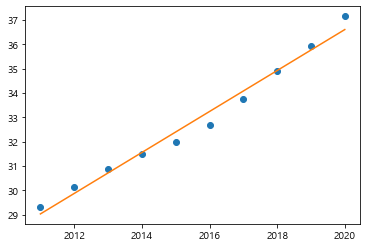

In [26]:
# coding=<utf-8>
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# -*- coding: utf-8 -*-
hw = pd.read_csv('C:/Users/lg/Desktop/data/전년도_65세이상인구비율.csv')
hw = hw.fillna(0)

year=np.array(range(2011,2021)) #2011~2020년

location = input("지역 입력: ")
data = hw[hw['행정구역'].str.contains(location)]

exam = data.iloc[:, 2:]
exam=np.array(exam)
print(exam)

exam=exam.reshape(-1,1)
year=year.reshape(-1,1)


line_fit = LinearRegression()
line_fit.fit(year,exam)
y_predicted =line_fit.predict(year)

print(data.filter(['행정구역']))
print('기울기 :',line_fit.coef_) #기울기
print('y 절편 :',line_fit.intercept_) # 절편

plt.plot(year,exam,'o')
plt.plot(year,y_predicted)
plt.show()